Utilizzando il dataset "Diabetes" disponibile in scikit-learn, sviluppa un modello
di regressione lineare per predire la progressione della malattia del diabete
basandoti sulle dieci misurazioni cliniche fornite.



Istruzioni:

Carica il dataset "Diabetes" utilizzando sklearn.datasets.load_diabetes().
Esplora i dati per comprendere le caratteristiche disponibili e la variabile
target.
Suddividi il dataset in set di training e test.
Crea un modello di regressione lineare utilizzando LinearRegression di scikit-
learn.
Addestra il modello sui dati di training.
Valuta le prestazioni del modello sui dati di test utilizzando metriche
appropriate come l'Errore Quadratico Medio (MSE) e il Coefficiente di
Determinazione (R²).
Analizza i risultati e discuti l'efficacia del modello.

In [82]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.decomposition import PCA

In [83]:
## rubato da https://www.geeksforgeeks.org/sklearn-diabetes-dataset/

# Load the diabetes dataset
diabetes_sklearn = load_diabetes()

# Convert the dataset to a DataFrame
diabetes_df = pd.DataFrame(data = diabetes_sklearn.data, columns = diabetes_sklearn.feature_names)

# Add target variable to the DataFrame
diabetes_df['target'] = diabetes_sklearn.target

print(diabetes_df.head())

# Print the shape of the feature matrix and target vector
print("Shape of Sklearn Diabetes Data:", diabetes_df.shape)

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
Shape of Sklearn Diabetes Data: (442, 11)


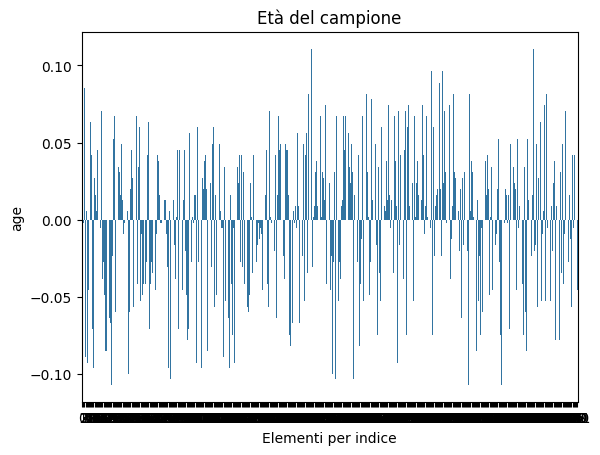

In [84]:
sns.barplot(x = diabetes_df.index, y = "age", data = diabetes_df)
plt.title("Età del campione")
plt.xlabel("Elementi per indice")
plt.show()

In [85]:
print(diabetes_df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [86]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [87]:
X = diabetes_sklearn.data
y = diabetes_sklearn.target

feature_names = diabetes_sklearn.feature_names
target = diabetes_sklearn.target

In [88]:
# Visualizza il numero di campioni per ciascuna classe
class_counts = diabetes_df['target'].value_counts()
print("Numero di campioni per ciascuna classe:")
print(class_counts)

Numero di campioni per ciascuna classe:
target
200.0    6
72.0     6
178.0    5
71.0     5
90.0     5
        ..
146.0    1
212.0    1
120.0    1
183.0    1
57.0     1
Name: count, Length: 214, dtype: int64


In [89]:
# Calcola le statistiche di base delle feature
feature_stats = diabetes_df.describe()
print("\nStatistiche di base delle feature:")
print(feature_stats)


Statistiche di base delle feature:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905

In [90]:
## target represents a quantitative measure of disease progression one year after baseline.

target_min = diabetes_df["target"].min()
target_max = diabetes_df["target"].max()
target_mean = diabetes_df["target"].mean()

print("Minimo del target:" + str(target_min))
print("Massimo del target:" + str(target_max))
print("Mean del target:" + str(target_mean))

Minimo del target:25.0
Massimo del target:346.0
Mean del target:152.13348416289594


In [91]:
## scaler = StandardScaler()
## X_scaled = scaler.fit_transform(X)

In [92]:
## Suddividi il dataset in set di training e test.
## Dividi i dati in 80% training e 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [93]:
## Crea un modello di regressione lineare utilizzando LinearRegression di scikit-learn.

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

In [94]:
## Addestra il modello sui dati di training.
## Inizializza il modello RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [95]:
# Predici le classi sul test set
y_pred = clf.predict(X_test)

In [96]:
## Valuta le prestazioni del modello sui dati di test utilizzando metriche appropriate
## l'Errore Quadratico Medio (MSE) e il Coefficiente di Determinazione (R²).

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

## Coefficiente di Determinazione (R²)

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

4379.29213483146
0.17343021817795368


In [97]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix)
from sklearn.model_selection import GridSearchCV


## parametri non ottimizzati
accuracy_opt = accuracy_score(y_test, y_pred)
precision_opt = precision_score(y_test, y_pred, average = 'weighted')
recall_opt = recall_score(y_test, y_pred, average = 'weighted')
f1_opt = f1_score(y_test, y_pred, average = 'weighted')

print("\nPerformance del modello Random Forest Base:")
print(f"Accuratezza: {accuracy_opt:.2f}")
print(f"Precisione: {precision_opt:.2f}")
print(f"Recall: {recall_opt:.2f}")
print(f"F1-score: {f1_opt:.2f}")



# Definisci la griglia di parametri da cercare per l'ottimizzazione
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Inizializza GridSearchCV per ottimizzare il modello
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mostra i migliori parametri trovati
print("\nMigliori parametri trovati:")
print(grid_search.best_params_)


# Utilizza il miglior modello trovato
best_clf = grid_search.best_estimator_

# Predici sul test set con il modello ottimizzato
y_pred_optimized = best_clf.predict(X_test)

# Calcola le metriche di performance del modello ottimizzato
accuracy_opt = accuracy_score(y_test, y_pred_optimized)
precision_opt = precision_score(y_test, y_pred_optimized, average = 'weighted')
recall_opt = recall_score(y_test, y_pred_optimized, average = 'weighted')
f1_opt = f1_score(y_test, y_pred_optimized, average = 'weighted')

print("\nPerformance del modello Random Forest Ottimizzato:")
print(f"Accuratezza: {accuracy_opt:.2f}")
print(f"Precisione: {precision_opt:.2f}")
print(f"Recall: {recall_opt:.2f}")
print(f"F1-score: {f1_opt:.2f}")


Performance del modello Random Forest Base:
Accuratezza: 0.00
Precisione: 0.00
Recall: 0.00
F1-score: 0.00


C:\Users\Rasty\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rasty\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rasty\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Migliori parametri trovati:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Performance del modello Random Forest Ottimizzato:
Accuratezza: 0.00
Precisione: 0.00
Recall: 0.00
F1-score: 0.00


C:\Users\Rasty\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rasty\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [98]:
## stesse metriche di prima ma optimized

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred_optimized))

## Coefficiente di Determinazione (R²)

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred_optimized))

5731.651685393258
-0.08182097407799427


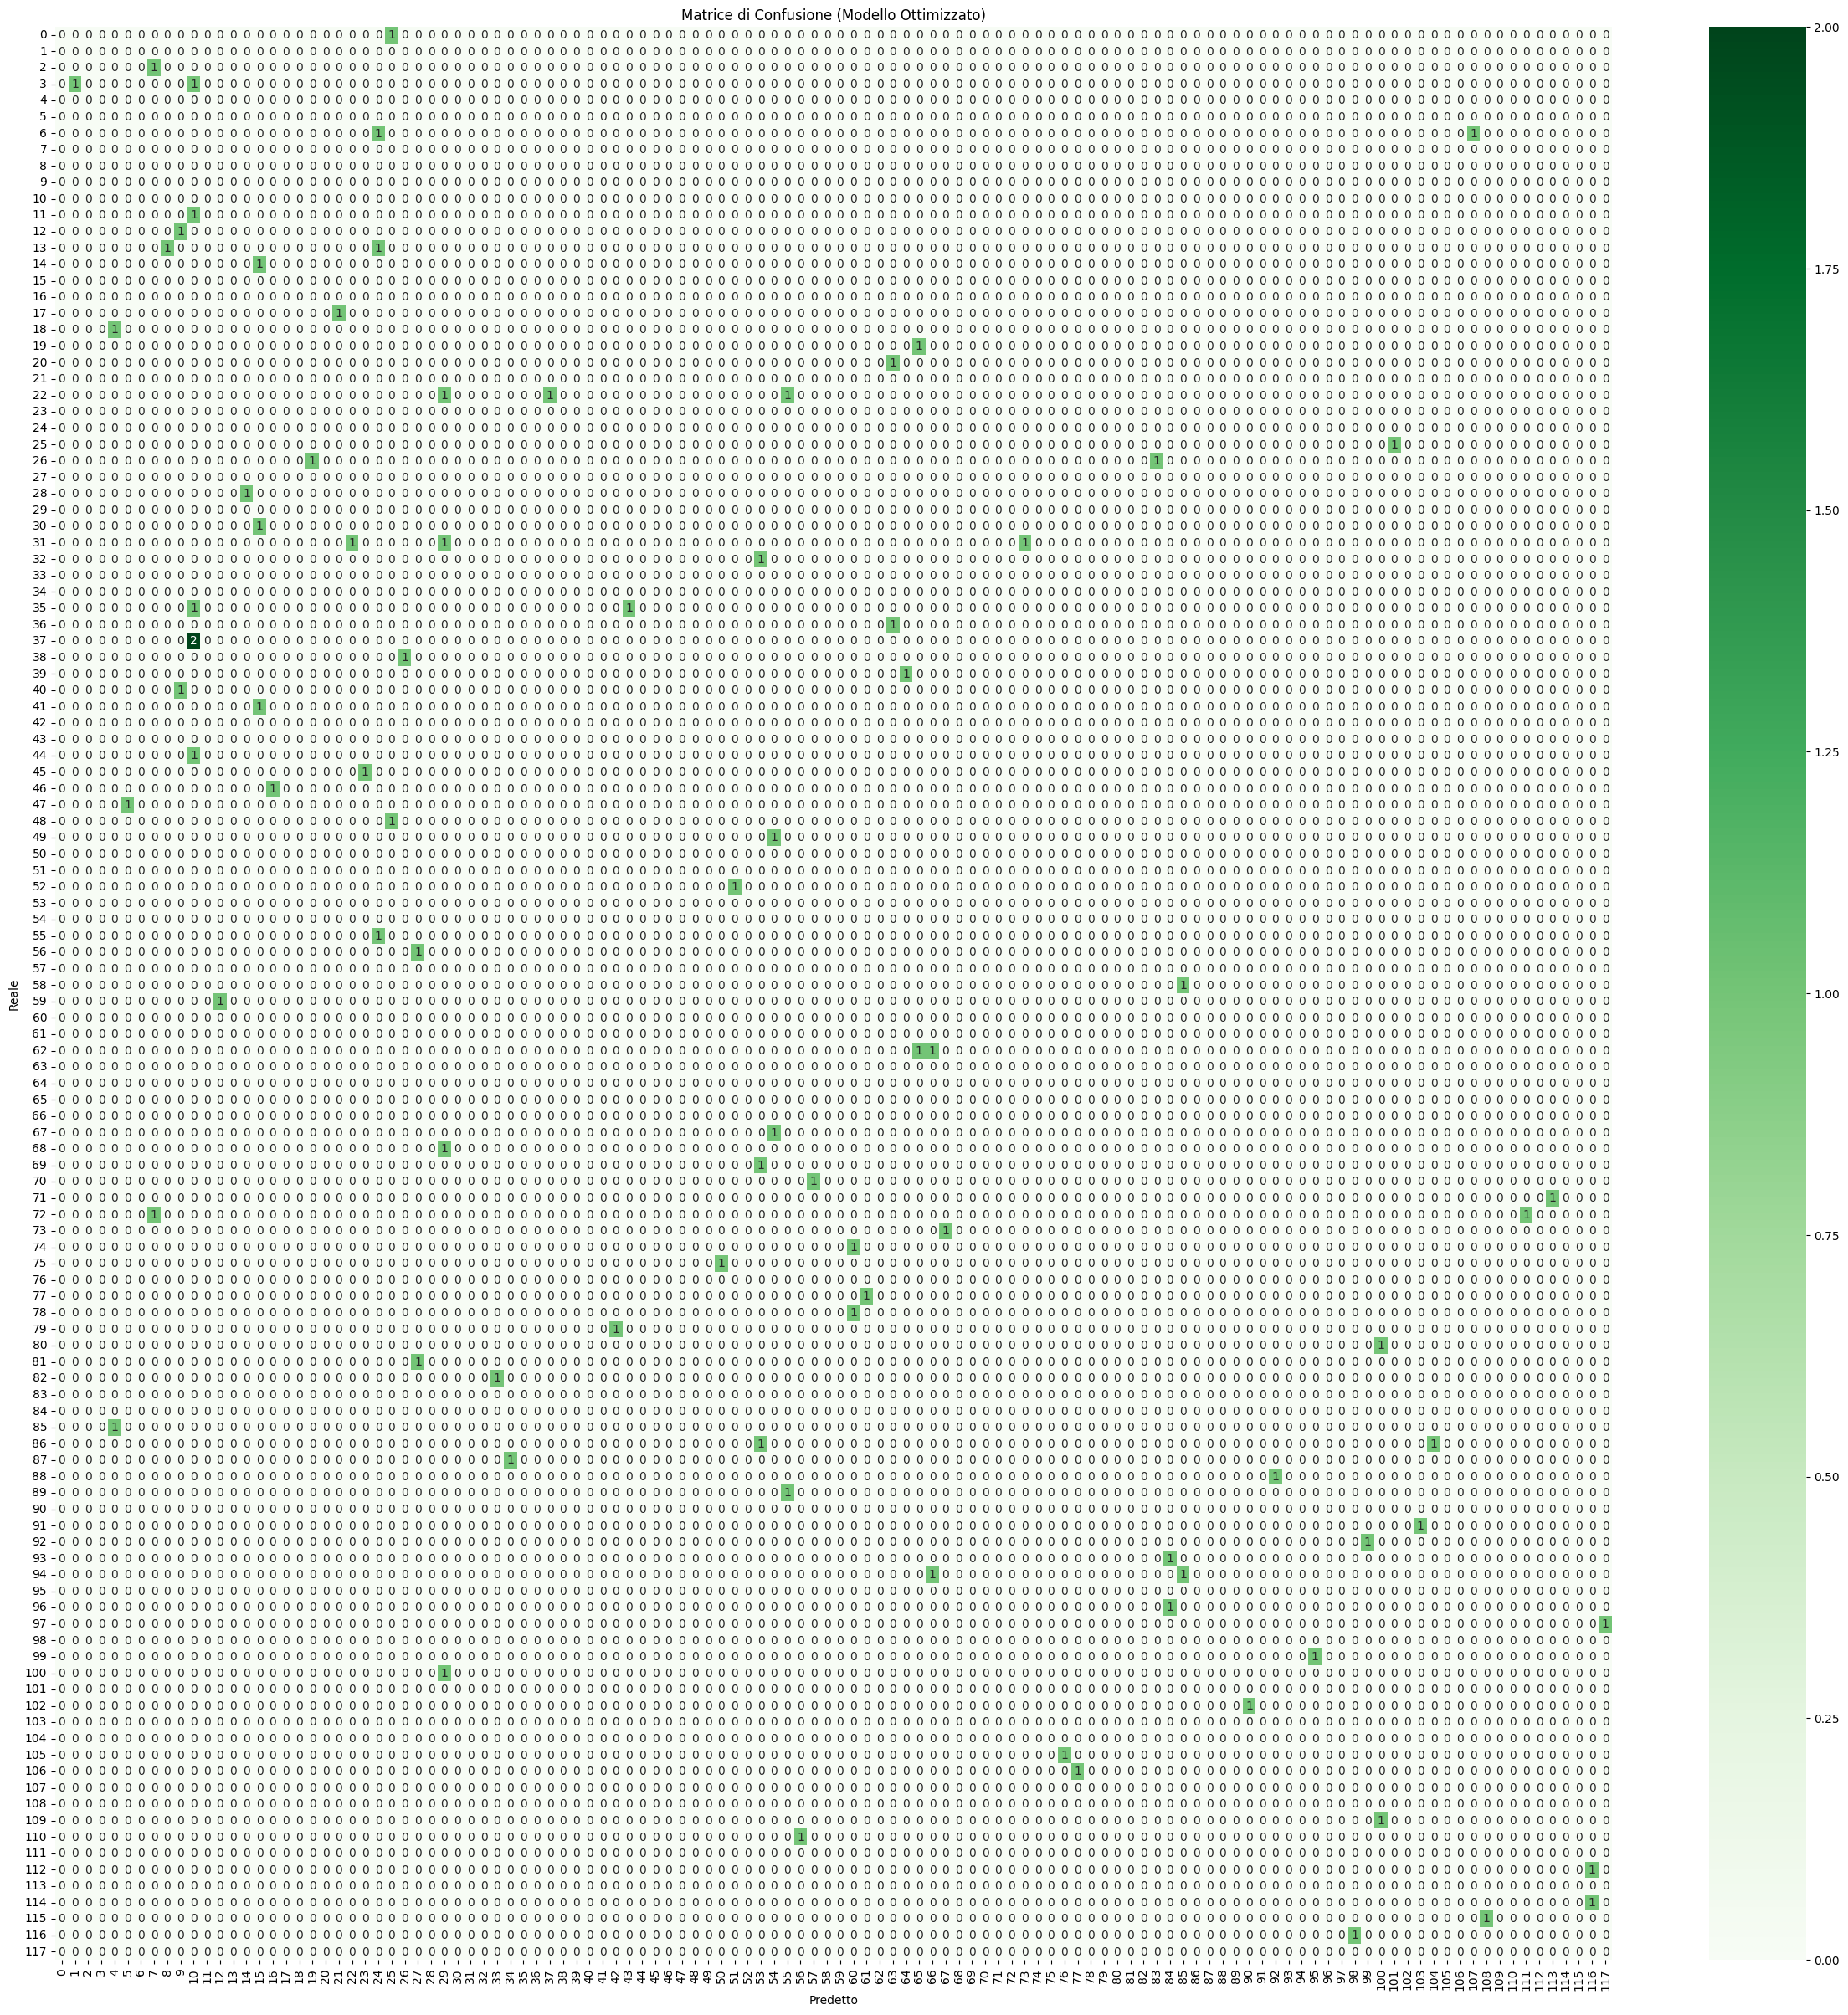

In [99]:
# Genera la matrice di confusione per il modello ottimizzato
cm_opt = confusion_matrix(y_test, y_pred)

# Visualizza la matrice di confusione del modello ottimizzato
plt.figure(figsize = (30,30))
sns.heatmap(cm_opt, annot = True, fmt = 'd', cmap = 'Greens')
plt.title('Matrice di Confusione (Modello Ottimizzato)')
plt.xlabel('Predetto')
plt.ylabel('Reale')
plt.show()

l'ottimizzazione riesce a rimuovere un 2 e 2 valori vicinissimi al centro

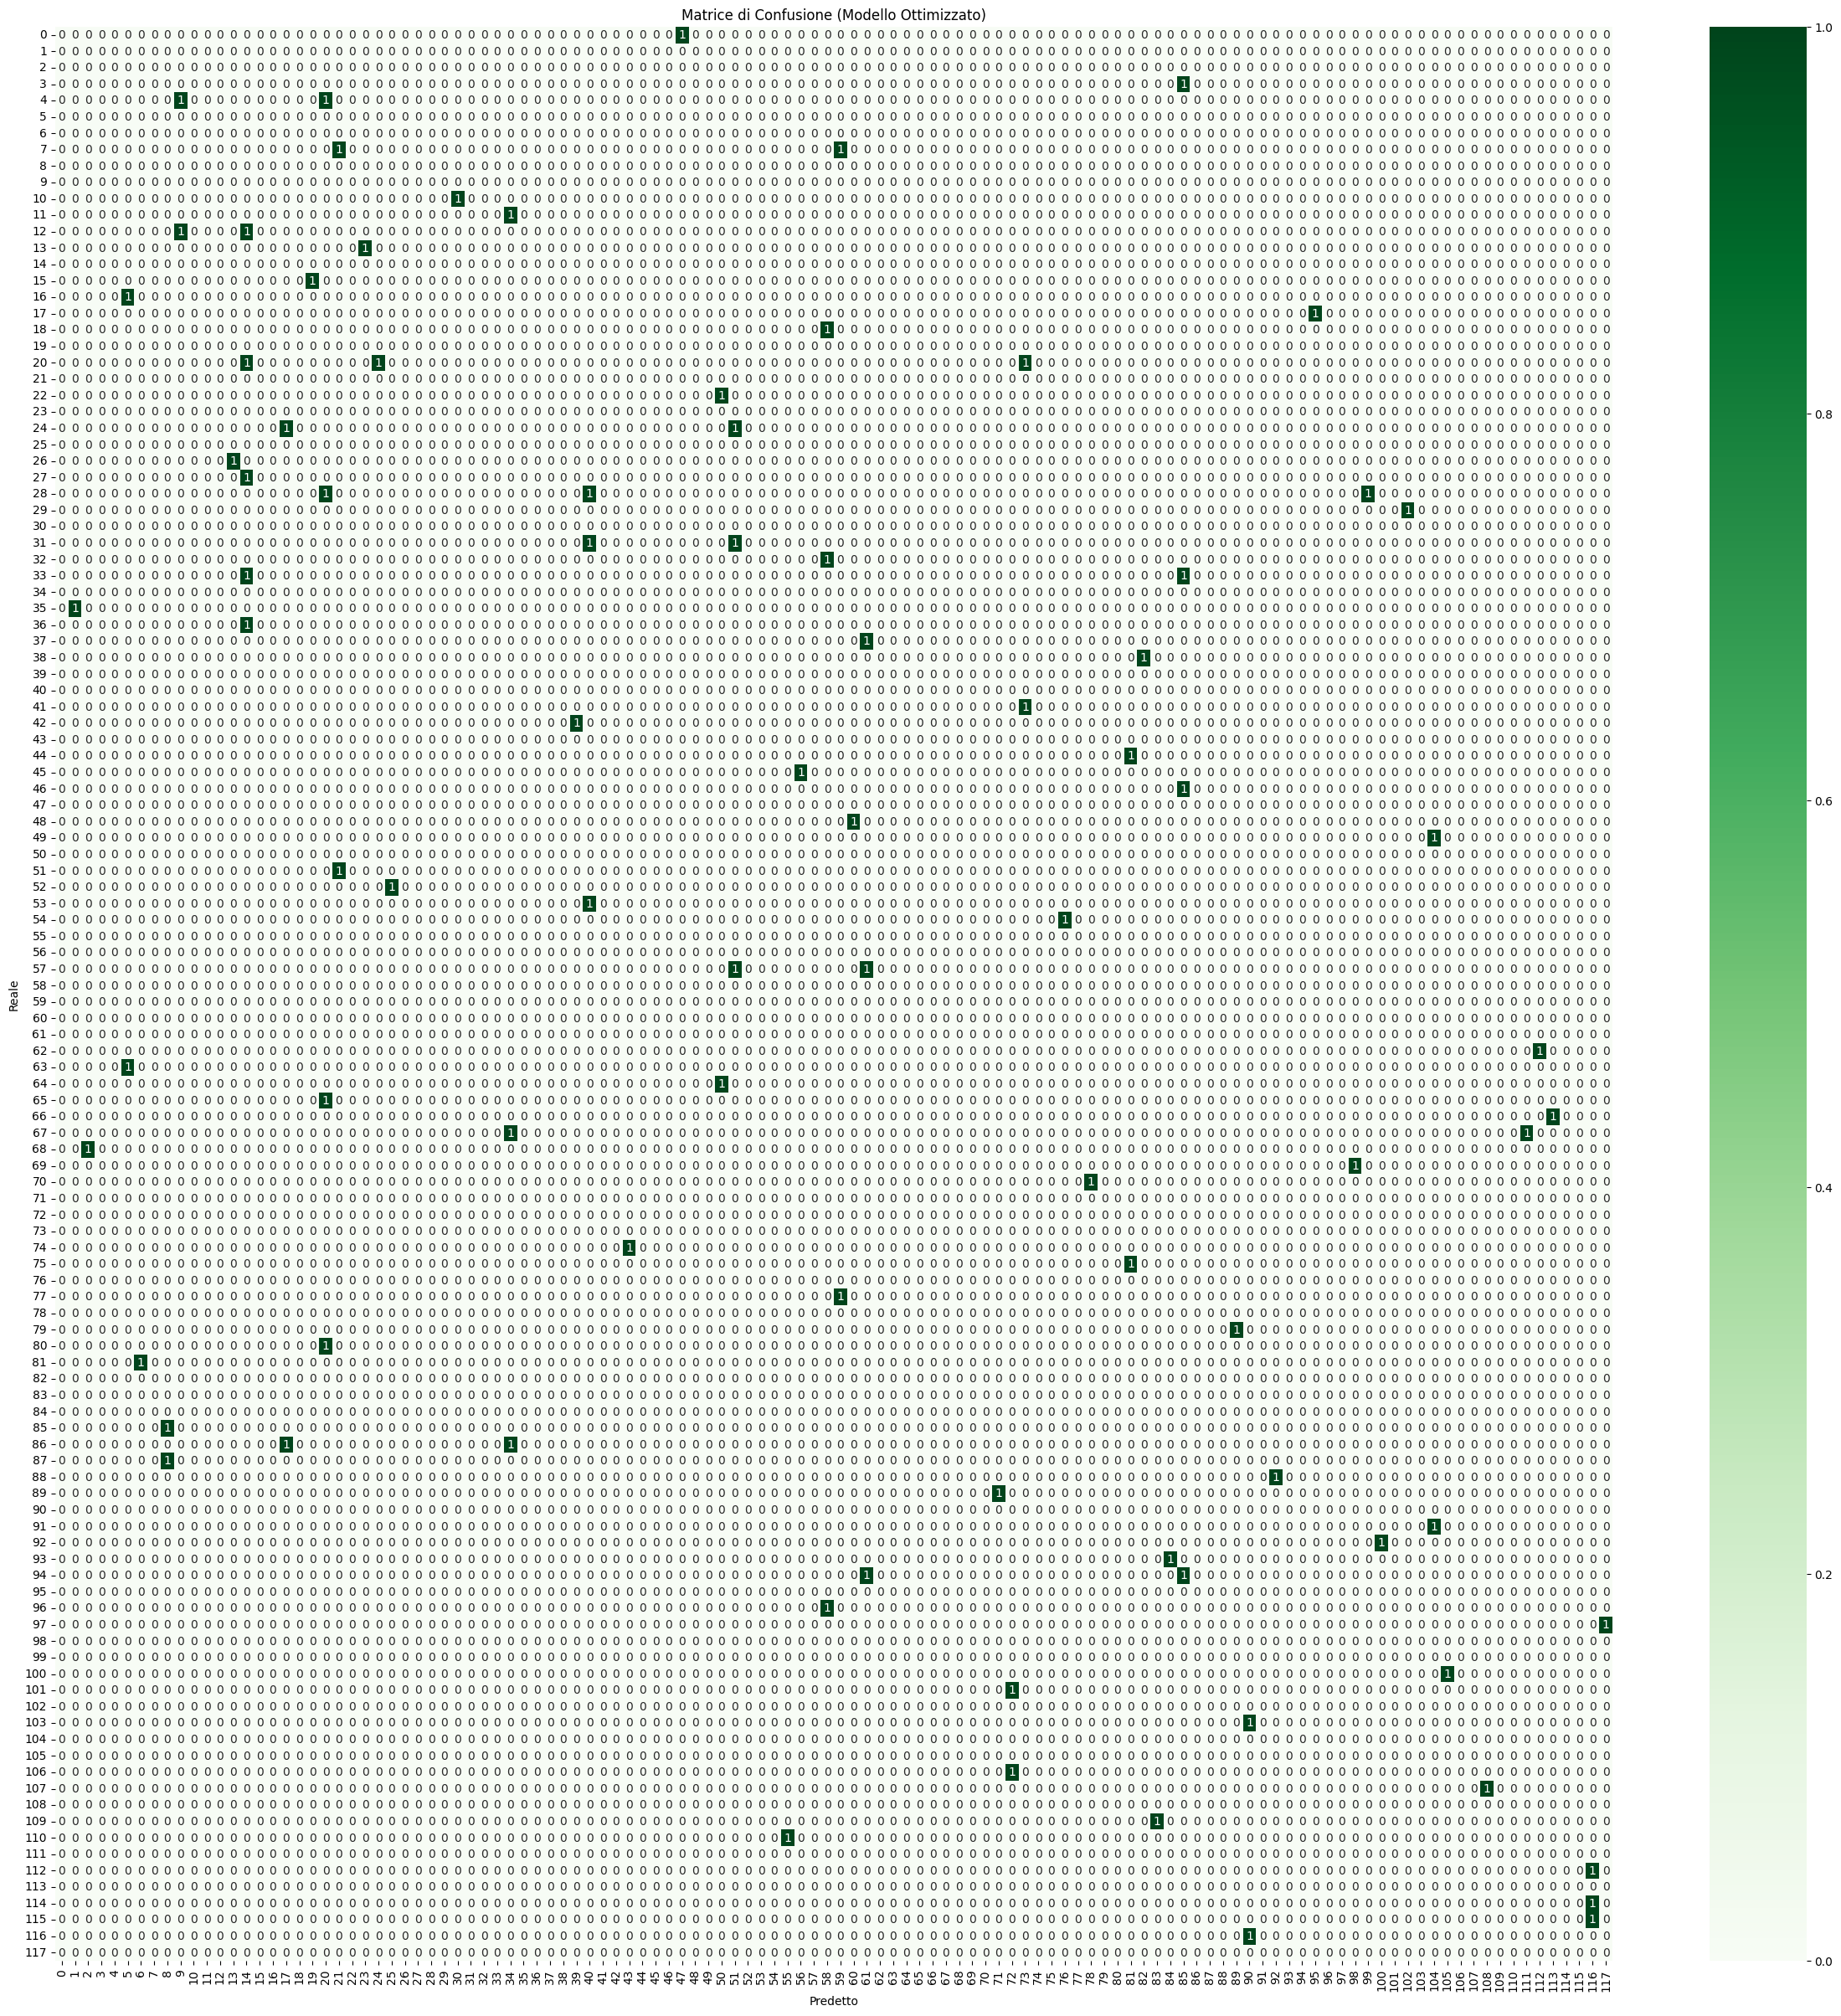

In [100]:
# Genera la matrice di confusione per il modello ottimizzato
cm_opt = confusion_matrix(y_test, y_pred_optimized)

# Visualizza la matrice di confusione del modello ottimizzato
plt.figure(figsize = (30,30))
sns.heatmap(cm_opt, annot = True, fmt = 'd', cmap = 'Greens')
plt.title('Matrice di Confusione (Modello Ottimizzato)')
plt.xlabel('Predetto')
plt.ylabel('Reale')
plt.show()